In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [9]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU'))) 
# It is supose to find my gpu. Still working to fix

Num GPUs Available: 0


In [3]:
def get_images(subset):
    images_dir = '../../datasets/brain_tumors'

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

    batch_size = 32
    img_height = 128    
    img_width = 128

    dataset = datagen.flow_from_directory(
        images_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset=subset
    )

    return dataset

In [4]:
train_data = get_images('training')
val_data = get_images('validation')

Found 2169 images belonging to 4 classes.
Found 927 images belonging to 4 classes.


In [5]:
train_data.class_indices, val_data.class_indices

({'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3},
 {'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3})

In [6]:
imgs, labels = next(train_data)
classes = list(train_data.class_indices.keys())

In [10]:
def plot_batch(imgs, labels, predictions=None, title=None):
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(19, 8))
    i, j = 0, 0
    for k, (img, label) in enumerate(zip(imgs, labels)):
        ax = axes[i, j]
        ax.imshow(img)
        index = label.argmax()
        real = classes[index]
        if predictions is not None:
            index = predictions[k].argmax()
            pred = classes[index]
            ax.set_title(f"real: {real} \n pred: {pred}") 
        else:
            ax.set_title(real)
        j = j + 1 if i >= 3 else j
        i = i + 1 if i < 3 else 0

    fig.suptitle(title)
    plt.tight_layout()
    plt.show

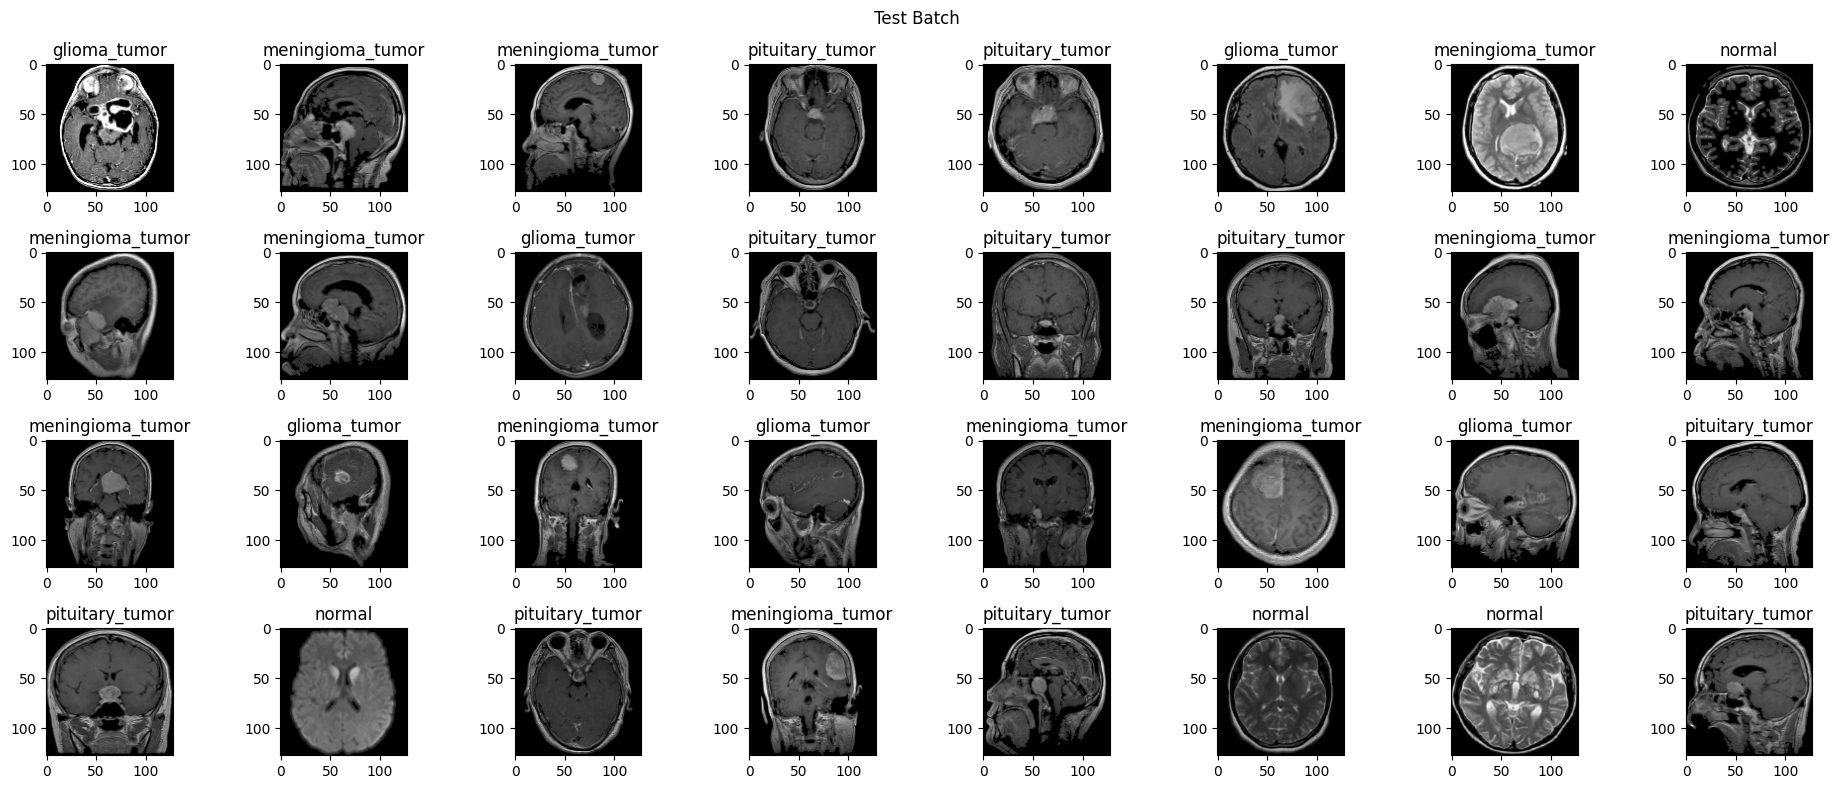

In [11]:
plot_batch(imgs, labels, title="Test Batch")

In [28]:
model = Sequential([
    Conv2D(input_shape=(128, 128, 3), filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=4, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)      

In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [31]:
history = model.fit(x=train_data, validation_data=val_data, epochs=10, verbose=2, batch_size=32)

Epoch 1/10
68/68 - 20s - loss: 1.2674 - accuracy: 0.4186 - val_loss: 1.3073 - val_accuracy: 0.4261 - 20s/epoch - 292ms/step
Epoch 2/10
68/68 - 18s - loss: 0.9284 - accuracy: 0.6187 - val_loss: 1.0701 - val_accuracy: 0.4714 - 18s/epoch - 272ms/step
Epoch 3/10
68/68 - 18s - loss: 0.7103 - accuracy: 0.7215 - val_loss: 0.8330 - val_accuracy: 0.6613 - 18s/epoch - 270ms/step
Epoch 4/10
68/68 - 20s - loss: 0.5435 - accuracy: 0.7944 - val_loss: 0.8034 - val_accuracy: 0.6785 - 20s/epoch - 294ms/step
Epoch 5/10
68/68 - 18s - loss: 0.3889 - accuracy: 0.8548 - val_loss: 0.8144 - val_accuracy: 0.7098 - 18s/epoch - 265ms/step
Epoch 6/10
68/68 - 19s - loss: 0.2842 - accuracy: 0.8949 - val_loss: 0.7417 - val_accuracy: 0.7217 - 19s/epoch - 275ms/step
Epoch 7/10
68/68 - 18s - loss: 0.2037 - accuracy: 0.9272 - val_loss: 0.8400 - val_accuracy: 0.7519 - 18s/epoch - 267ms/step
Epoch 8/10
68/68 - 18s - loss: 0.1561 - accuracy: 0.9442 - val_loss: 1.0550 - val_accuracy: 0.7141 - 18s/epoch - 262ms/step
Epoch 9/

Fix overfitting

In [32]:
test_imgs, test_labels = next(val_data)

In [33]:
predictions = np.round(model.predict(x=test_imgs, verbose=0))

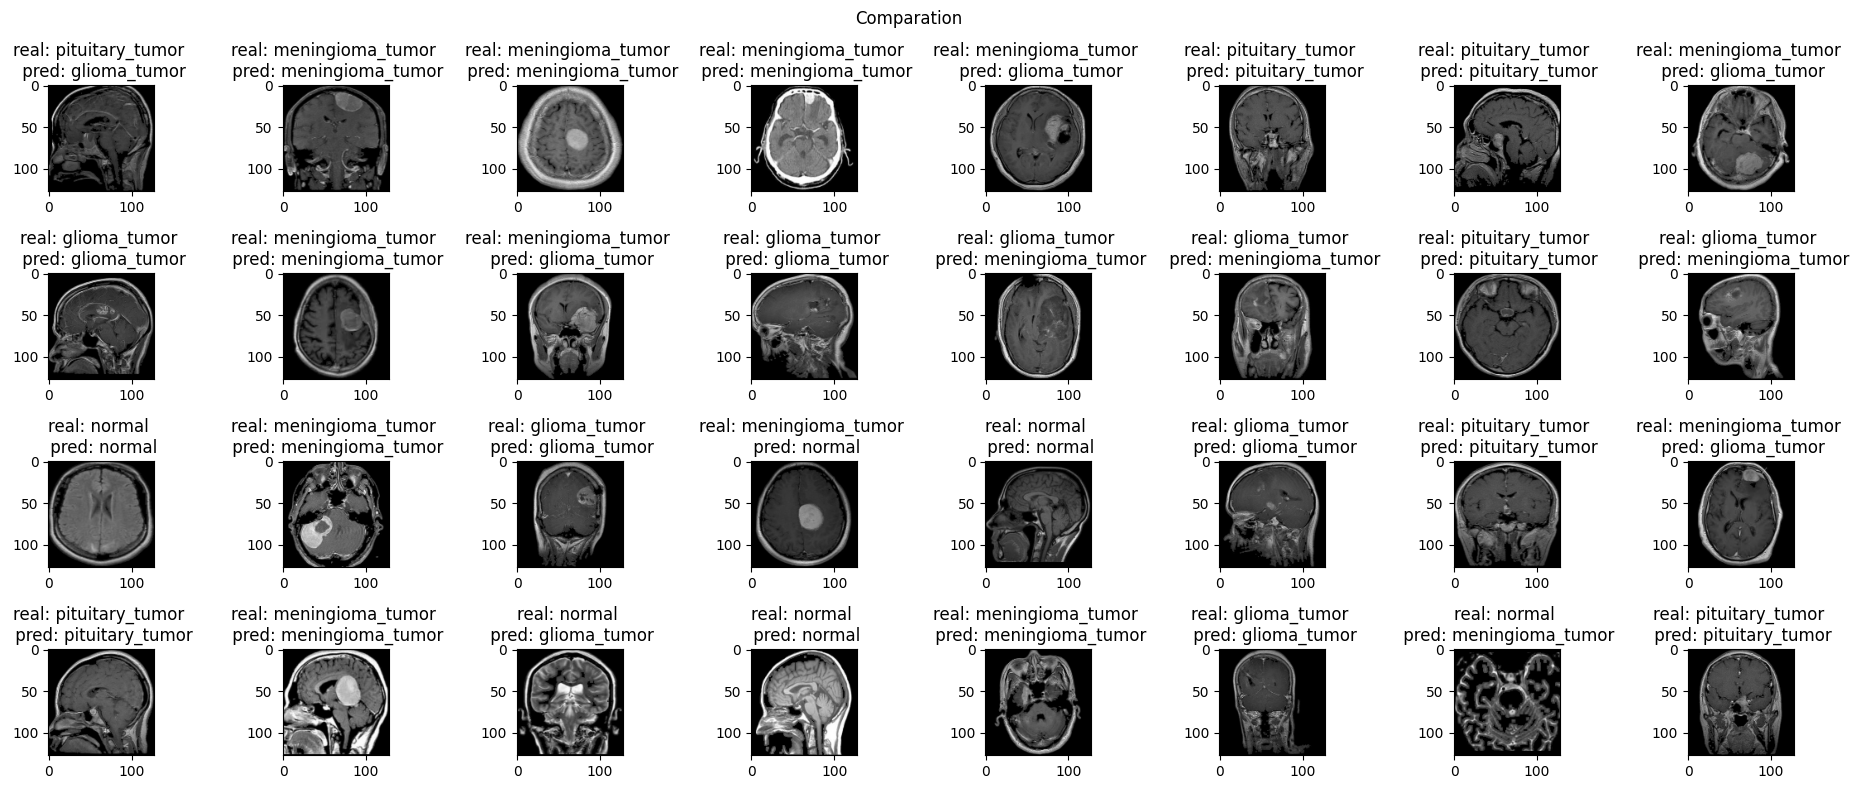

In [35]:
plot_batch(test_imgs, test_labels, predictions=predictions, title="Comparation")